# Events Comparison - Spring 2019 and Spring 2020

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
# first get data_dir
data_dir = '/Users/andrew_boles/Documents/BUCC - Department Reports/EventsComparison/data/'
os.listdir(data_dir)

['events_spring2020.csv',
 'events_spring2019.csv',
 'events_spring2019 - old.csv']

In [3]:
# import both csvs as dataframes
df_2019 = pd.read_csv(data_dir + 'events_spring2019.csv')
df_2020 = pd.read_csv(data_dir + 'events_spring2020.csv')

In [4]:
# renaming columns
new_column_names = ['CareerCenterName','EmployerName','EventStartDate','EventStartTime','EventName','EventType']
df_2019.columns = new_column_names
df_2020.columns = new_column_names

### Breakdown of the Events for each semester:

In [5]:
# different event counts for each year
print('Spring 2019 Event Types Count: ')
print(df_2019['EventType'].value_counts().to_string())
print('\nSpring 2020 Event Types Count: ')
print(df_2020['EventType'].value_counts().to_string())

Spring 2019 Event Types Count: 
Virtual Session           82
Employer On-site          54
Info Session              45
Other                     30
Workshop                   8
Speaker/Panel              3
Classroom Presentation     1

Spring 2020 Event Types Count: 
Info Session       19
Other              14
Workshop            9
Virtual Session     3


In [6]:
# remove Virtual Sessions
index_virtual_2019 = df_2019[df_2019['EventType'] == 'Virtual Session'].index
index_virtual_2020 = df_2020[df_2020['EventType'] == 'Virtual Session'].index
df_2019.drop(index_virtual_2019 , inplace=True)
df_2020.drop(index_virtual_2020, inplace=True)

In [7]:
# remove CPD Career Center Events
index_cpd_2019 = df_2019[df_2019['CareerCenterName'] == 'CPD Career Center'].index
df_2019.drop(index_cpd_2019, inplace=True)

In [8]:
# now lets check which employers were scheduled; create a series for each employers value_counts:
employers_2019 = df_2019['EmployerName'].value_counts()
employers_2020 = df_2020['EmployerName'].value_counts()

In [9]:
# number of employers on campus: (note that I want to do this better for a report)
print('In 2019, there were {} employers on campus and there is currently {} employers scheduled to be on campus in 2020.'.format(
    employers_2019.shape[0], employers_2020.shape[0]))

In 2019, there were 18 employers on campus and there is currently 16 employers scheduled to be on campus in 2020.


### Top 10 Employers for each semester

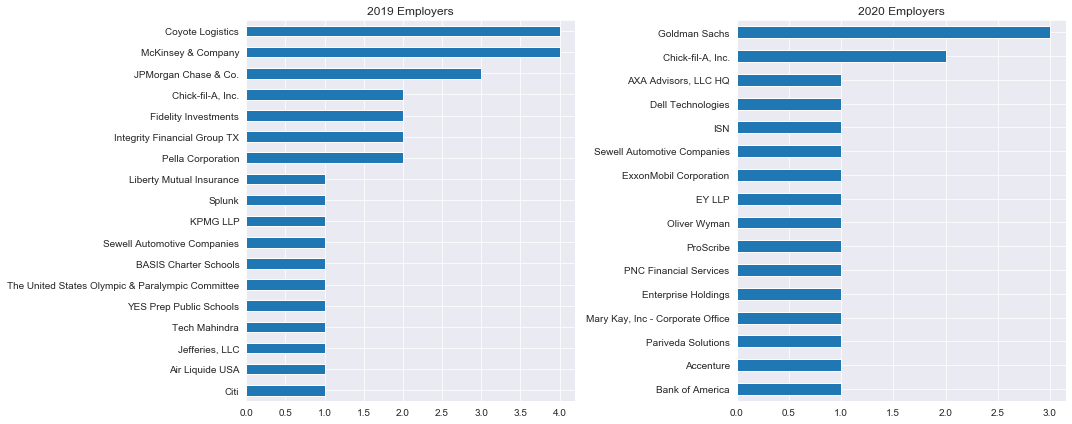

In [10]:
# look at the top 10 employers from each semester
employers_2019 = employers_2019.sort_values(ascending=True)
employers_2020 = employers_2020.sort_values(ascending=True)
fix, (ax1,ax2) = plt.subplots(1,2, figsize=(15,6))
employers_2019.tail(20).plot(kind='barh', ax=ax1, title='2019 Employers')
employers_2020.tail(20).plot(kind='barh', ax=ax2, title='2020 Employers')
plt.tight_layout()

In [11]:
# create a df for just employer events; starting with 2019
df_2019['NumEventsPerDate'] = df_2019.groupby('EventStartDate')['EventStartDate'].transform('count')
df_2020['NumEventsPerDate'] = df_2020.groupby('EventStartDate')['EventStartDate'].transform('count')
df_employer_2019 = df_2019.dropna(subset=['EmployerName'])
print('2019 -- New: {} ; Old: {}'.format(df_employer_2019.shape, df_2019.shape))
df_employer_2020 = df_2020.dropna(subset=['EmployerName'])
print('2020 -- New: {} ; Old: {}'.format(df_employer_2020.shape, df_2020.shape))

2019 -- New: (30, 7) ; Old: (69, 7)
2020 -- New: (19, 7) ; Old: (42, 7)


In [12]:
df_employer_2019 = df_employer_2019.reset_index(drop=True)
df_employer_2020 = df_employer_2020.reset_index(drop=True)

In [13]:
df_employer_2019['EventStartDate'] = pd.to_datetime(df_employer_2019['EventStartDate'], format='%Y-%m-%d')
df_employer_2020['EventStartDate'] = pd.to_datetime(df_employer_2020['EventStartDate'], format='%Y-%m-%d')

### Distribution of events over each semester

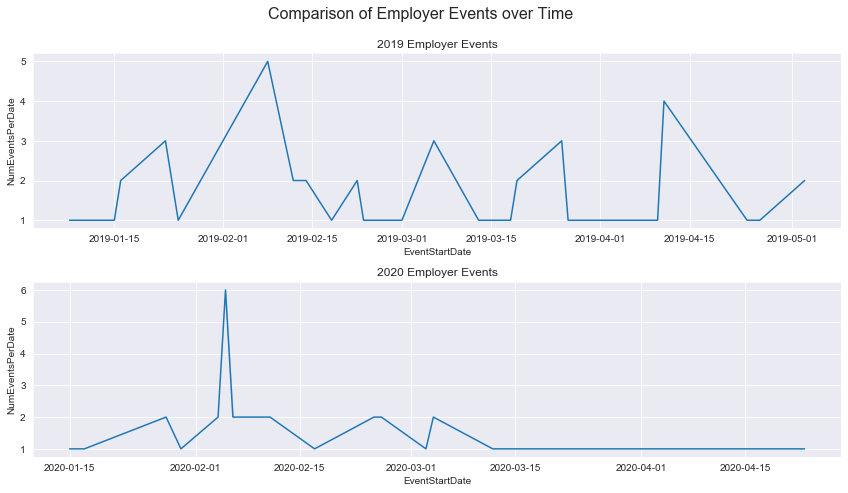

In [14]:
my_date_format = mdates.DateFormatter('%Y-%m-%d')
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(12,10))
sns.lineplot(x='EventStartDate', y='NumEventsPerDate', data=df_employer_2019, ax=ax1)
ax1.xaxis.set_major_formatter(my_date_format)
ax1.title.set_text('2019 Employer Events')
sns.lineplot(x='EventStartDate', y='NumEventsPerDate', data=df_employer_2020, ax=ax2)
ax2.xaxis.set_major_formatter(my_date_format)
ax2.title.set_text('2020 Employer Events')
fig.suptitle('Comparison of Employer Events over Time', fontsize=16)
plt.tight_layout(rect=[0,0.3,1,0.95])

In [15]:
# finally lets look at the workshops:
workshops_2019 = df_2019[df_2019['EventType'] == 'Workshop'].reset_index(drop=True)
workshops_2020 = df_2020[df_2020['EventType'] == 'Workshop'].reset_index(drop=True)

### Breakdown of the Workshops for each semester
#### Note that Spring 2020 already has 3 times as many workshops scheduled than Spring 2019 had in total

In [16]:
print('2019 Workshop Counts: ')
print(workshops_2019['EventName'].value_counts().to_string())
print('\n2020 Workshop Counts: ')
print(workshops_2020['EventName'].value_counts().to_string())

2019 Workshop Counts: 
Accounting Pre-Internship Session - Internship Overview & Requirements    2
Tips for Success: Balancing Work, Life and Building Connections           1

2020 Workshop Counts: 
Café Résumé                                                                  3
Make-It Take-It Resume/Cover Letter Workshop for Robbins College Students    1
The Path Forward                                                             1
Career Workshop for International Students                                   1
Healthcare Careers Summit                                                    1
Pariveda AI/ML Workshop                                                      1
Start Smart Salary Negotiation Workshop for Women- Spring 2020               1
